In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
#X, y = make_classification(n_samples=1000, n_features=48, n_informative=5, n_classes=9, random_state=42)

## Read the data

In [3]:
# Read the data
data = pd.read_csv('preprocessed_data.csv')

In [4]:
data

,Unnamed: 0,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,...,psdbeta_13,psdtheta_14,psdalpha_14,psdbeta_14,age,gender,participant,video,video_name,target
0,0,-0.150843,-0.150624,-0.166261,-0.145117,-0.143640,-0.119170,-0.475254,-0.468150,-0.330365,...,-0.419732,-0.195563,-0.195812,-0.204449,22,0,1,1,10,7
1,1,-0.128521,-0.129717,-0.155580,-0.105668,-0.108871,-0.168438,0.302383,0.258150,-0.121029,...,-0.175393,-0.153317,-0.153977,-0.166154,22,0,1,2,2,0
2,2,-0.103209,-0.103515,-0.122637,-0.109388,-0.111235,-0.140875,0.063157,0.057745,0.006707,...,-0.117177,-0.046608,-0.046963,-0.051510,22,0,1,3,14,2
3,3,-0.181723,-0.184244,-0.230825,-0.113030,-0.114522,-0.139100,-0.067104,-0.068218,-0.071644,...,-0.311654,-0.150296,-0.150274,-0.153138,22,0,1,4,15,5
4,4,-0.043894,-0.042331,-0.032673,-0.148676,-0.152181,-0.201394,0.314590,0.301284,0.191730,...,0.125982,0.075506,0.078709,0.108396,22,0,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,409,-0.259796,-0.264659,-0.351959,-0.215325,-0.223008,-0.347720,-0.282586,-0.281040,-0.263415,...,0.063415,-0.052881,-0.052248,-0.049186,25,0,23,14,3,4
410,410,-0.220586,-0.227271,-0.333407,-0.083146,-0.084745,-0.115249,-0.452527,-0.461702,-0.518178,...,-0.490378,0.071075,0.065080,0.012865,25,0,23,15,8,5
411,411,-0.054579,-0.056091,-0.082380,0.014625,0.014887,0.025082,0.225323,0.234515,0.292967,...,-0.042684,-0.025692,-0.028928,-0.061149,25,0,23,16,11,1
412,412,-0.242060,-0.244057,-0.288320,-0.134908,-0.139699,-0.208673,-0.238502,-0.241715,-0.257637,...,-0.480054,-0.119080,-0.118926,-0.121816,25,0,23,17,16,8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   414 non-null    int64  
 1   psdtheta_1   414 non-null    float64
 2   psdalpha_1   414 non-null    float64
 3   psdbeta_1    414 non-null    float64
 4   psdtheta_2   414 non-null    float64
 5   psdalpha_2   414 non-null    float64
 6   psdbeta_2    414 non-null    float64
 7   psdtheta_3   414 non-null    float64
 8   psdalpha_3   414 non-null    float64
 9   psdbeta_3    414 non-null    float64
 10  psdtheta_4   414 non-null    float64
 11  psdalpha_4   414 non-null    float64
 12  psdbeta_4    414 non-null    float64
 13  psdtheta_5   414 non-null    float64
 14  psdalpha_5   414 non-null    float64
 15  psdbeta_5    414 non-null    float64
 16  psdtheta_6   414 non-null    float64
 17  psdalpha_6   414 non-null    float64
 18  psdbeta_6    414 non-null    float64
 19  psdtheta

In [7]:
y = data.target
X = data.drop('target' , axis = 1)

## Splitting the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

### Choosing the best k value

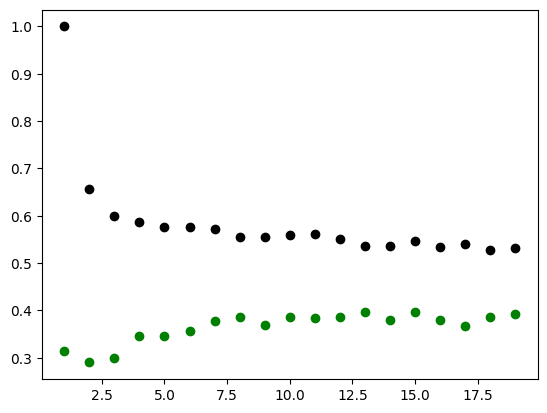

In [44]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Making the model

In [33]:
#KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    #create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    #fit the model
    KNN.fit(X_train, y_train)
    
    #get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    #predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [45]:
KNN_test, KNN_train, KNN_prediction = KNN(X_train, y_train, X_test, y_test, 15)
print(KNN_test, KNN_train)

0.39666666666666667 0.5471428571428572


### Evaluating the model

In [46]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test, KNN_prediction)

TypeError: 'numpy.float64' object is not callable

In [31]:
Scores = {
    "Model":["KNN"],\
    "Accuracy":[accuracy_score*100],\
    "Precision":[precision_score*100],\
    "Recall":[recall_score*100],\
    "F1":[f1_score*100]
    }

Scores=pd.DataFrame(Scores)
Scores

,Model,Accuracy,Precision,Recall,F1
0,KNN,0.8,0.8,0.8,0.8


# SVM models

In [16]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    #create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    #fit the model
    SVM.fit(X_train, y_train)
    
    #get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    #predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [17]:
#SVM classifier using linear kernel
SVM_linear_test, SVM_linear_train, SVM_linear_prediction = SVM(X_train, y_train, X_test, y_test, 'linear')
print(SVM_linear_test, SVM_linear_train)

0.544 0.7024221453287197


In [18]:
#SVM classifier using RBF kernel
SVM_rbf_test, SVM_rbf_train, SVM_rbf_prediction = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(SVM_rbf_test, SVM_rbf_train)

0.064 0.1314878892733564


In [19]:
#SVM classifier using sigmoid kernel
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(SVM_sigmoid_test, SVM_sigmoid_train)

0.096 0.12110726643598616


In [20]:
#SVM classifier using polynomial kernel
SVM_poly_test, SVM_poly_train, SVM_poly_prediction = SVM(X_train, y_train, X_test, y_test, 'poly')
print(SVM_poly_test, SVM_poly_train)

0.056 0.13494809688581316


### Evaluating the models

In [21]:
accuracy_score_poly, precision_score_poly, recall_score_poly, f1_score_poly = Evaluate(y_test, SVM_poly_prediction)

accuracy_score_linear, precision_score_linear, recall_score_linear, f1_score_linear = Evaluate(y_test, SVM_linear_prediction)

accuracy_score_sigmoid, precision_score_sigmoid, recall_score_sigmoid, f1_score_sigmoid = Evaluate(y_test, SVM_sigmoid_prediction)

accuracy_score_rbf, precision_score_rbf, recall_score_rbf, f1_score_rbf = Evaluate(y_test, SVM_rbf_prediction)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Scores = {
    "Model":["Linear SVM","RBF SVM","Sigmoid SVM","Poly SVM"],\
    "Accuracy":[accuracy_score_linear*100, accuracy_score_rbf*100, accuracy_score_sigmoid*100, accuracy_score_poly*100],\
    "Precision":[precision_score_linear*100, precision_score_rbf*100, precision_score_sigmoid*100, precision_score_poly*100],\
    "Recall":[recall_score_linear*100, recall_score_rbf*100, recall_score_sigmoid*100, recall_score_poly*100],\
    "F1":[f1_score_linear*100, f1_score_rbf*100, f1_score_sigmoid*100, f1_score_poly*100]
    }

Scores=pd.DataFrame(Scores)
Scores